<center><h1 style=" font-family:Tahoma;font-size:4.5em;">
UNIV*6080
</h1></center>

<center><h2 style=" font-family:Tahoma;font-size:2.7em;">
Major Project  
</h2></center>


<center><h2 style=" font-family:Tahoma;font-size:2em;">
<b>Chapter10:</b> Dimensionality Reduction Using Principle Component Analysis
</h2> </center>


<text style="font-family:Tahoma; font-size:1.2em;">
<b>Student Name and Last Name</b>:  Onur Surucu <br> 
<b>Student ID</b>:  0968305
</text>


In [1]:
# Installing necessary modules using pip
!pip install matplotlib numpy requests IPython seaborn sklearn 

# Importing the necessary modules
import PIL
import requests
import io
from matplotlib.image import imread
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
import seaborn as sns
from sklearn import datasets
import random

### **Introduction**:  
Principle Component Analysis (PCA) is extremely useful when dealing with massive dataset or high dimensional data such as images etc. Processing these type of large data vectors can be extremely expensive. However, we can calculate the principle components of the dataset and use them to reduce the features of the dataset without changing its internal structure. Examples of its many applications include data compression, image processing, visualisation, exploratory data analysis, pattern recognition and time series prediction. In this document, we will firstly cover essential linear algebra theorems for PCA, then implement PCA using Python.   

### **Table of Contents**:
1. Essential Linear Algebra Principles for PCA:
    1. Basis Change
    1. Orthogonal Projection
    1. Eigenvalue Decomposition
    1. Singular Value Decomposition
1. Principle Component Analysis
1. PCA Using Low-Rank Matrix Approximations
1. PCA in High Dimensions
1. Conclusion
1. Reference

---
<center><h2> Essential Principals Before Starting PCA </h2></center>
<text>Before we go deep into the PCA, we need to cover some principles which are essential concepts that will help to perceive PCA's structure.</text>
<div> </div>

## **Chapter 2.7.1 - Basis Change**:  
Let's say we need to transform our matrix into a higher dimension.

**Basis:** 
In a vector space $V$, $B = ({b_1...b_n})$ is a basis if every element of $V$ can be created by using elements of $B$. 

<br/><br/>
For a linear mapping $\phi : V \to W $, Let's say that we have two different basis: $B_{old} = (v_1...v_n)$ and $B_{new} = ({w_1...w_n})$.
The following vectors are the transformed vectors $\tilde{B}_{old} = ({\tilde{v}_1...\tilde{v}_n})$ and $\tilde{B}_{new} = ({\tilde{w}_1...\tilde{w}_n})$.

$A_{\phi}$ specifies the transformation matrix of $\phi$ which transforms basis vector $B_{new}$ to $B_{old}$ in this example, the other transformation matrix is $\tilde{A_{\phi}}$ with respect to bases $\tilde{B}_{new}$ and $\tilde{B}_{old}$.
<br/><br/>
$$\tilde{A_{\phi}} = T^{-1}A_{\phi}S$$
<br/>

Here, $S$ is the transformation matrix of $id_v$ that maps cordinates with respect to $\tilde{B}_{new}$ onto cordinates with respect to $B_{old}$, and $T$ is the transformation matrix of $id_w$ that maps cordinates with respect to $\tilde{B}_{old}$ onto cordinates with respect to $B_{old}$ [1].

**Summary:**
$$A_{\phi} : B \to C $$
$$\tilde{A}_{\phi} : \tilde{B}_{old} \to \tilde{B}_{new} $$
$$S : \tilde{B}_{old} \to B_{old} $$
$$T : \tilde{B}_{new} \to B_{new} $$


In order to give a visualized explanation, this code of snippet has been provided as an example. There are two different basis in this coordinate system: blue and red. In the figure below, green vector has been presented through both basises [2]:

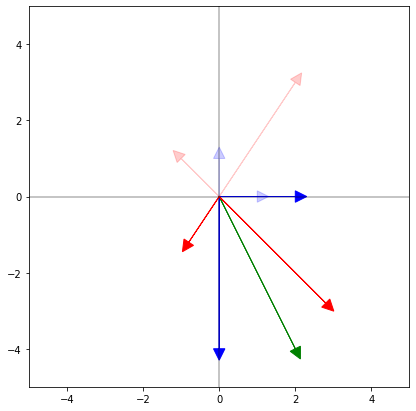

In [2]:
%matplotlib inline
figsize = [7, 7]

fig, ax = plt.subplots()
#Our two basises are initialized
b_new = np.array([[1, 0],[0, 1]]).T
b_old = np.array([[2, 3],[-1, 1]]).T

# Transformation matrix is initialized
A = b_old
# initialize vector v
v = np.array([2, -4])

#Calcuating the transformed version of our basis_new
b_new_t = np.array([[0,1],[-1,0]]).T
#Our transformation matrix from b_new to b_new_t
T = b_new_t

v_b_old = np.linalg.inv(A)@v
# The faded vectors represents the two different basis of the subspace.
# Faded Red vectors: old basis
# Faded vectors of b_old
ax.arrow(0, 0, b_old[0,0], b_old[1,0] , fc='r', ec='r', head_width=0.3, head_length=.3, alpha=.2)
ax.arrow(0, 0, b_old[0,1], b_old[1,1] , fc='r', ec='r', head_width=0.3, head_length=.3, alpha=.2)
# Blue vectors: new basis
# The vectors of b_new
ax.arrow(0, 0, b_new[0,0], b_new[1,0] , fc='b', ec='b', head_width=0.3, head_length=.3, alpha=.2)
ax.arrow(0, 0, b_new[0,1], b_new[1,1] , fc='b', ec='b', head_width=0.3, head_length=.3, alpha=.2)


# All the vectors are plotted using b_new basis.
# Green vector: v vector
ax.arrow(0, 0, v[0], v[1] , fc='g', ec='g', head_width=0.3, head_length=.3)

#Solid blue vector: representation with b_new basis 
ax.arrow(0, 0, v[0]*b_new[0,0], v[0]*b_new[1,0] , fc='b', ec='b', head_width=0.3, head_length=.3)
ax.arrow(0, 0, v[1]*b_new[0,1], v[1]*b_new[1,1] , fc='b', ec='b', head_width=0.3, head_length=.3)

#Solid red vector: representation of the v vector with b_old basis
ax.arrow(0, 0, v_b_old[0]*b_old[0,0], v_b_old[0]*b_old[1,0] , fc='r', ec='r', head_width=0.3, head_length=.3)
ax.arrow(0, 0, v_b_old[1]*b_old[0,1], v_b_old[1]*b_old[1,1] , fc='r', ec='r', head_width=0.3, head_length=.3)


ax.axis([-5, 5, -5, 5])
ax.set_aspect('equal')
ax.axhline(color='k', alpha=.3)
ax.axvline(color='k', alpha=.3)

fig.set_size_inches(figsize)

---

## Chapter 3.8: Orthogonal Projections

PCA can be defined as the orthogonal projection of the data onto a lower dimensional linear space, known as the principal subspace, such that the variance of the projected data is maximized. That is why, this concept is extremely useful when representing low dimensional dataset with low dimensional versions. 

$\pi : V \to U $ called a projection if $\pi^2 = \pi \circ \pi = \pi$. We assume that the inner product is the dot product. 

$$\pi(x) = \lambda b = \frac{<x,b>}{||b||^2}b = \frac{b^Tx}{||b||^2b}$$

where $\pi(x)$ represents the projection location of $V$ on which is length $\lambda$ times the length of **b** that spans our one-dimensional subspace $U$ [1]. The example below is the implementation of the theory using Python. The figure shows that perpendicular projection from blue to red vector.

0.6470588235294118
[2.58823529 0.64705882]


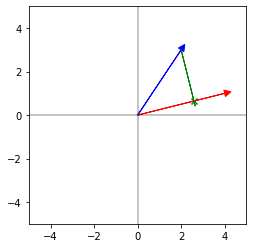

In [3]:
#PROJECTION ONTO ONE DIMENSIONAL SUBSPACE

# Initializing our two vectors
b = np.array([2,3])
x = np.array([4,1])

# Finding the scalar coefficient of x to find the projection location on the x vector. 
lamb = (x.T @ b) / (x.T @ x)
print(lamb)
# Finding the projection location on x (Pi_u)
Pi_u = x*lamb
print(Pi_u)

#Plotting
%matplotlib inline
figsize = [9,9]
fig, ax = plt.subplots()
# Plotting our x and y vectors
# Red vector: x
# Blue vector: y
ax.arrow(0, 0, b[0], b[1] , fc='b', ec='b', head_width=0.3, head_length=.3)
ax.arrow(0, 0, x[0], x[1] , fc='r', ec='r', head_width=0.3, head_length=.3)
# Plotting the projection vector
ax.arrow(2, 3, Pi_u[1], Pi_u[0]*-1 , fc='g', ec='g')
# Plotting the projection location of y on x 
ax.scatter(Pi_u[0], Pi_u[1], c = 'g',marker = 'x')

ax.axis([-5, 5, -5, 5])
ax.set_aspect('equal')
ax.axhline(color='k', alpha=.3)
ax.axvline(color='k', alpha=.3)

---

## Chapter 3.8: Eigenvalue Decomposition

In linear algebra, eigendecomposition or sometimes spectral decomposition is the factorization of a matrix into a canonical form, whereby the matrix is represented in terms of its eigenvalues and eigenvectors. Only diagonalizable matrices can be factorized in this way.The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude[10].

**Eigenvalues and Eigenvectors:**
Every linear mapping has a special matrix given an ordered basis. By using eigenvalue and eigen vectors, we can express the original matrix through using eigen vectors. This can be used to represent a large dimensional matrix.

$$A\lambda = \lambda x$$

$A$ is a square matrix where,  $x$ is its eigenvector and $\lambda$ is its eigenvalue [1].  

**Cholesky Decomposition:**  
A symmetric and definite matrix $A$ can be reformed by using $A = LL^T$, where $L$ is lower-triangular matrix with positive diagonal elements:
<br/> <br/>

$$
\begin{bmatrix}
a_{11} & \cdots & a_{n1}\\
\vdots &  \ddots & \vdots\\
a_{n1} & \cdots  & a_{nn}
\end{bmatrix}
=
\begin{bmatrix}
l_{11} & \cdots & 0\\
\vdots &  \ddots & \vdots\\
l_{n1} & \cdots  & l_{nn}
\end{bmatrix}
\begin{bmatrix}
l_{11} & \cdots & l_{n1}\\
\vdots &  \ddots & \vdots\\
0 & \cdots  & l_{nn}
\end{bmatrix}
$$



**Matrix Diagonalization:**

A *diagonal matrix* only holds value on its diagonals and all-off diagonal elements has zero value. 

$$
D 
= 
\begin{bmatrix}
c_{11} & \cdots & 0\\
\vdots &  \ddots & \vdots\\
0 & \cdots  & c_{n}
\end{bmatrix}
$$

<br/><br/>
A matrix $A$ $\Large{\epsilon}$ $\mathbb{R^{n\times n}}$ is diagonalizable, if there exists an invertible matrix $P$ $\Large{\epsilon}$ $\mathbb{R^{n\times n}}$ which is formed by collection of the eigenvectors of $A$ [1].
<br/><br/>
$$D=P^1AP$$

Again, we can apply our rule to achieve diagonalized matrix:

In [21]:
A = np.array([[5, -1],[-2,5]]) #Original matrix to approximate
#Checking whether our matrix is invertible
#If det is not zero it means that the matrix is invertible.
print("det(A): ",np.linalg.det(A))
# Calculating the eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(A)
P = eig_vec

D = np.linalg.inv(P)@A@P
print("\nEquivalently diagonalized matrix: \n",D)


det(A):  23.0

Equivalently diagonalized matrix: 
 [[ 6.41421356e+00  0.00000000e+00]
 [-2.22044605e-16  3.58578644e+00]]


---

## Chapter 4.5: Singular Value Decomposition (SVD)

SVD is based on a theorem from linear algebra which says that a rectangular matrix $A$ can be broken down into the product of three matrices - an orthogonal matrix $U$, $U^TU = I$, a diagonal
matrix $S$ consists of singular values, and the transpose of an orthogonal matrix $V$, $V^T V = I$. The theorem has been formulated in this form:

$$A_{mn} = U_{mm} S_{mn}V_{nn}^T$$

where the columns of $U$ are orthonormal eigenvectors  of $AA_T$,the columns of $V$ are orthonormal eigenvectors of $A^TA$ and $S$ is a diagonal matrix consists the square roots of eigenvalues from $U$ or $V$ in descending order [1].

The following example approximates small matrix $A$ using SVD to test our theorem:

In [5]:
#---------------------Singular Value Decomposition---------
A = np.array([[1, 0, 1], [-2, 1, 0]]) # Initializing the original matrix to approximate
A_square = A.T.dot(A) # Convert the matrix into a square matrix R^(nxn)

# Calculating the eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(A_square)

# Sorting the square rooted eigen values and placing them on the diagoanls
S = np.nan_to_num(np.diag(np.sqrt(np.sort(eig_val)[::-1])))

# Applying the same index change to eigenvectors (manually)   
V = eig_vec[:, [0, 2, 1]]

# Achieving the U matrix using eigenvectors and eigenvalues.
S = S[:2, :] # Our third eigenvalue is 0, So the third row is removed. 
u1 = (1 / S[0, 0]) * A @ V[:, 0]
u2 = (1 / S[1, 1]) * A @ V[:, 1]

# Constructing the U vector from u1 & u2
U = np.column_stack((u1, u2))
# Approximating matrix A using SVD
A_appr = U @ S @ V.T
print("A approxited matrix: \n")
print(A_appr)

A approxited matrix: 

[[ 1.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-2.00000000e+00  1.00000000e+00 -5.55111512e-17]]


/Users/onursurucu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


----  




## Chapter 10: PRINCIPLE COMPONENT ANALYSIS (PCA)

PCA is a dimensionality reduction method, especially used for representing high-dimensional dataset with smaller dimensions that still contains most of the information in the large set. The goal is to find a lower dimensional representation of the dataset, then without losing any information, approximate the dataset matrix back. The following two formulas represent the goal of PCA: 

$$z_n = B^Tx_n$$

where $z_n$ is the low-dimensional compressed representation of $x_n$ and $B^T$ is the projection matrix where it's columns are orthonormal, $b_i^Tb_j^T = 0$. Then, we can reconstruct the original data using the projection matrix $B$[1].

$$\tilde{x} = B z_n$$




Key steps of PCA in Practice:
<br></br>  
1) Mean subtraction   
2) Standardization   
3) Eigendecomposition of the covariance matrix   
4) Projection  



**Generating the Dataset**:

We have created a two dimensional Gaussian noisy dataset with a normal distribution to illustrate PCA while practicing. As can be seen from the figure below, the mean is centered at (10,10). Hence, the data must be normalized before applying any operation [3]. 


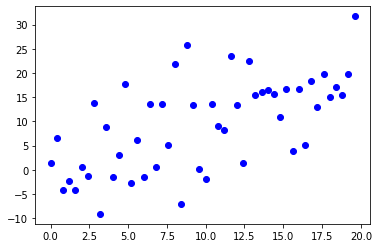

In [6]:
# Generating Gaussian Noisy Cloud
def corr_vars( start=-10, stop=10, step=0.4, mu=0, sigma=6, func=lambda x: x ):
    np.random.seed(25)
    # Generate x
    x = np.arange(start, stop, step)    
    # Generate random noise
    e = np.random.normal(mu, sigma, x.size)
    # Generate y values as y = func(x) + e
    y = np.zeros(x.size)
    for ind in range(x.size):
        y[ind] = func(x[ind]) + e[ind]

    return (x,y)

x, y = corr_vars()
X = np.array((x+10,y+10)).T #Let's center the dataset at (10,10)

#Plotting our dataset
%matplotlib inline
plt.scatter(X[:,0], X[:,1], color='b', label="Gaussian Distribution")

**Mean Subtraction**:
<br></br>
First of all, the dataset should be centered into the origin. Every data point is subtracted by the mean. Thus, the dataset will have 0 mean.

$$X_{normalized} = X - \mu$$

where $X$ is our dataset, $\mu$ is the mean and $X_{normalized}$ is the centered dataset [1], [6]. 


In [7]:
#-------Normalization--------
def normalize(X):
    mean = np.mean(X) # Calculating the average
    std = np.std(X) # Calculating the standard deviation
    # Dividing by the standard deviation
    X_norm = X - mean * np.ones(X.shape) # Achieving the normalized dataset. 
    return X_norm, mean, std

X_norm, mean, std = normalize(X) 

**Standardization**:
<br></br>
Divide the data points by the standard deviation of the dataset for every dimension. Thus, the data is unitless and each axis has 1 variance.

$$ \frac{X-\mu}{\sigma}$$

where $\sigma$ is the standard deviation of the dataset [1] , [4].

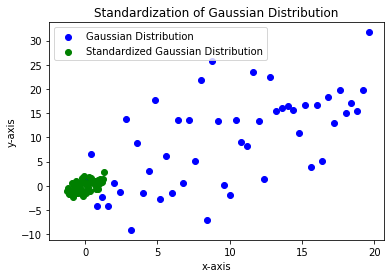

In [8]:
#----------STANDARDIZATION--------
def standardize(X_norm, std):
    X_stand = X_norm / std 
    return X_stand

X_stand = standardize(X_norm, std) 

#Plotting standardized data and non-prerocessed data 
%matplotlib inline

# Blue dots: Original dataset 
plt.scatter(X[:,0], X[:,1], color='b', label="Gaussian Distribution")

# Green dots: Standardized dataset
plt.scatter(X_stand[:,0], X_stand[:,1], color='g', label="Standardized Gaussian Distribution")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Standardization of Gaussian Distribution')
plt.legend(loc="upper left")

**Eigendecomposition of the covariance matrix**:
<br></br>
Compute the data covaraince matrix using the standardized dataset. 

$$ S = \frac{1}{N} \sum^N_{n=1}{x_nx_n^T}$$

Then, calculate the corresponding eigenvalues and eigenvectors. We use the spectral theorem which states that ONB can be only found if the covariance matrix is symmetric [1].

$$Sb_m = \lambda_m b_m$$

where $b_m$ is the eigenvectors and $\lambda_m$ is the eigenvalues of the standardized matrix $S$. In practice, the eigenvalues should be in a descending order and each corresponding eigenvector's order should be changed as the sorting eigenvalues [1]. 

In [9]:
def covariance(X_stand):
    S = 1/X_stand.shape[0] * np.dot(X_stand ,X_stand.T)
    return S
#Calculating the covariance matrix
S = covariance(X_stand)

def sorted_eigens(S):
    #Find eigenvalues and eigenvectors
    eig_val, eig_vec = np.linalg.eig(S)
    # Sorting the eigenvalues and eigenvectors
    sorted_index = np.argsort(eig_val)[::-1]
    eig_val = np.real(eig_val[sorted_index])
    eig_vec = np.real(eig_vec[sorted_index])
    return eig_val, eig_vec
eig_val, eig_vec = sorted_eigens(S)

**Projection**:
<br></br>
After these computation, we can project our standardized dataset onto principal subspace. Now, the projection can be performed by using projection matrix $B$ which consists of eigenvectors as its columns. [1] , [5]. 

$$z_n = B^Tx_n$$

Note that, the equation above returns the coordinates not the projection. we need to undo the standardization [1], [7].


<Figure size 936x1440 with 0 Axes>

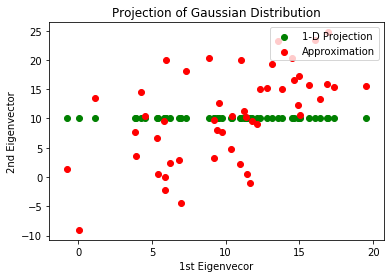

In [10]:
B = np.real(eig_vec) # The real eigen vectors
projection_matrix = (B @ np.linalg.pinv(B.T @ B) @ B.T) #Projection matrix
approx = (projection_matrix.T @ X_stand)
approx = approx * std + mean


# Illustrating the projection onto the zero axis 
%matplotlib inline
fig = plt.figure(figsize=(13, 20))
fig, ax = plt.subplots()

ax.scatter(approx[:,0], [10] * len(approx[:,0]), color='g', label="1-D Projection")
ax.scatter(approx[:,0], approx[:,1], color='r', label="Approximation")

plt.xlabel('1st Eigenvecor')
plt.ylabel('2nd Eigenvector')
plt.title('Projection of Gaussian Distribution')
plt.legend(loc="upper right")
plt.show()

Now, we will analyze the RMSE of our approximation between the dataset as the number of principle components increases. Since, the eigenvectors are sorted in a descending order, the convergence rate decreases as we add more principle components.

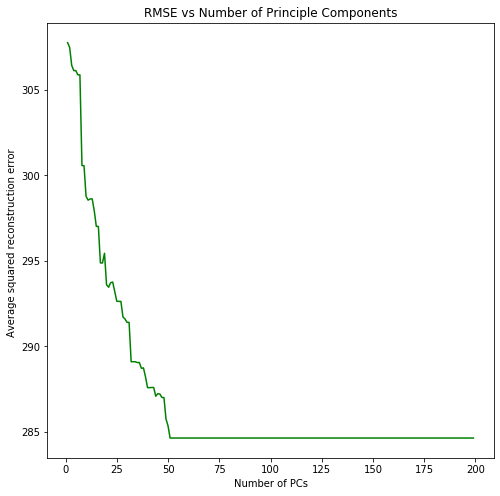

In [11]:
# Plotting the averaged squared error as the number components have been added
pca_nums = 200 

def rmse(X, X_stand, eig_vec, pca_nums):
    rmse=[]
    for pca_num in range(1,pca_nums):
        B = eig_vec[:,:pca_num-1]
        projection_matrix = (B @ np.linalg.pinv(B.T @ B) @ B.T) 
        approx = (projection_matrix.T @ X_stand)
        pprox = approx * std + mean
        rmse.append(np.square(approx - X).sum(axis=1).mean())
    return rmse

rmse_vals = rmse(X, X_stand, eig_vec, pca_nums)
fig = plt.figure(figsize=(8,8))
plt.plot(range(1,len(rmse_vals)+1), rmse_vals, color='g')

plt.xlabel('Number of PCs')
plt.ylabel('Average squared reconstruction error ')
plt.title('RMSE vs Number of Principle Components')
plt.show()

---

<h2 align="center"> PCA Using Low-Rank Matrix Approximations</h2>

PCA and SVD are closely related approaches and both can be applied to decompose any rectangular matrices. Let's say our dataset has the properties below:

$$X = [x_1,\cdots,x_N] \epsilon \mathbb{R}^{D\times N} $$



As we have seen from projection, maximizing the variance of the projected data will yield more accurate results. Hence, we use the singular value decomposition to achieve the maximum variance view. 

$$ X_{D\times N} = U_{D\times D} \Sigma_{D\times N} V^T_{N\times N}  $$

As we reformulate PCA and SVD, we can find a close relation between them. The derivation below proves the relationship between singular values $\Sigma$ and eigenvalues of PCA [1],[9].

$$\lambda = \frac{\Sigma^2}{N} $$


PCA chooses the columns of $U$ in to be the eigenvectors that are associated with the M largest eigenvalues of the data covariance matrix S and the rest of the eigenvalues is truncated. Thus, we identify U as the projection matrix B in which projects the original data onto lower-dimensioanl subspace of dimension M.

$$ \tilde{X}_{D\times M} = U_{D\times M} \Sigma_{M\times M} V^T_{M\times N}  $$

where $\tilde{X}$ represents the approximation of the matrix $X$ [1]. 



The given example below illustrates the impact of rank when approximating a matrix. A large sized image has been used as our dataset and it was converted to a matrix where the value at every pixel is the luminance. As can be seen that even with 5 eiegenvectors and eigenvalues we can distinguish the shape of the earth and the image becomes nearly identical as we increase the rank of our matrices. 

In [14]:
# Fetching the earth image from given URL
url = "https://upload.wikimedia.org/wikipedia/commons/9/97/The_Earth_seen_from_Apollo_17.jpg"
response = requests.get(url)
image_bytes = io.BytesIO(response.content)
img = PIL.Image.open(image_bytes)
# Converting the image into a matrix with greyscale
img = img.convert("L") 
X = np.asarray(img.convert('L'))  

# Normalizing
X_norm, mean, std = normalize(X) 
# Standardization
X_stand = standardize(X_norm, std)
# Compute Covariance Matrix 
M = 1/X_stand.shape[0] * X_stand.T @ X_stand
# Find eigenvalues and eigenvectors
eig_vals, eig_vecs = sorted_eigens(M)

# SVD
# By choosing False: we truncate our matrix when we reach insignificant eigen values.
# Calculating the U, S, V (transpose) matrices of SVD using our dataset
U, S, VT = np.linalg.svd(X_stand, full_matrices=False, compute_uv=True) 

# Proving the relationship between PCA and SVD by applying formula the printing first 5 elements.
print("SVD: (Signma^2/N) : \n")
print((np.square(S) / (X_stand.shape[0]))[:5],"\n")
print("Eigenvalues of Covariance Matrix: \n")
print(eig_vals[:5])

SVD: (Signma^2/N) : 

[1362.76286354  607.72236897  209.15171453  144.54955711  102.42479413] 

Eigenvalues of Covariance Matrix: 

[1362.76286354  607.72236897  209.15171453  144.54955711  102.42479413]


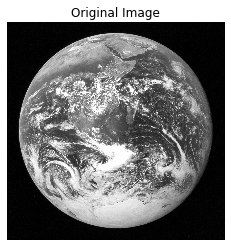

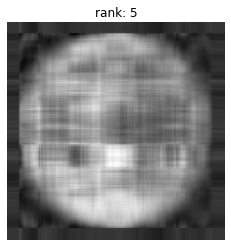

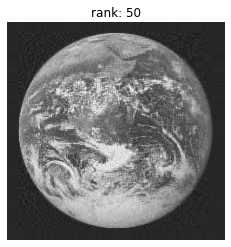

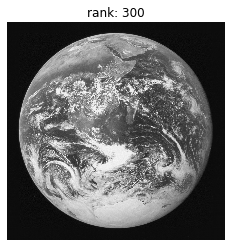

In [15]:
S = np.diag(S)  # Building  diagonal singular values.

#---------Plotting the images----------
# Showing the original image
plt.figure(1)
img = plt.imshow(X)  # Plot the image
img.set_cmap("gray")  # Specify that the image is in greyscale
plt.axis("off")
plt.title("Original Image")


#Plotting the rest of the images sorted by their rank
i = 2 # figure number
for rank in [5, 50, 300]: # iterating through ranks of the matrix 
    Approx = U[:, :rank] @ S[:rank, :rank] @ VT[:rank, :]  # Approximating the original matrix using SVD formula. 
    plt.figure(i) # Figure number of the image
    img = plt.imshow(Approx)  # Convert the matrix into image
    img.set_cmap("gray")  # Specify that the image is in greyscale
    plt.axis("off") # There is no axis needed
    plt.title("rank: {}".format(rank)) # Labeling the title of each figure
    i += 1 # Next figure

plt.show() # Show all the figures

<h2 align="center"> PCA in High Dimensions</h2>

If the dataset becomes large, the process becomes computationally expensive while computing the data covariance matrix. Assume that we have a dataset with $D>>N$.


$$S=\frac{1}{N}XX^T \epsilon  \mathbb{R}^{D\times D}$$ 

Therefore, PCA we have discussed earlier will be infeasable in such cases. Our solution is to represent the data covariance matrix with lower dimensions. So that we can compute the eigenvalues and eigenvectors much more efficiently than for the original $D \times D$ data covariance matrix.


$$S=\frac{1}{N}X^TX \epsilon  \mathbb{R}^{N\times N}$$ 

Then, eigenvectors and eigenvalues with $M$ largest values of the covariance matrix is calculated. Lastly, the ortohogonal projection of the data is achieved using ortohogonal columns of $U$ matrix[1].

The following snippet uses a large sized image as its dataset. We firstly computed the lower dimensional representation of our matrix, then encode it back using the projection matrix to approximate the original matrix.


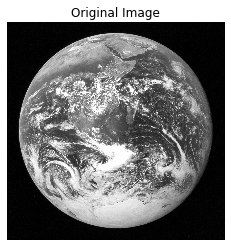

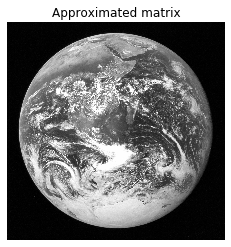

In [16]:
# Fetching the earth image from given URL
url = "https://upload.wikimedia.org/wikipedia/commons/9/97/The_Earth_seen_from_Apollo_17.jpg"
response = requests.get(url)
image_bytes = io.BytesIO(response.content)
img = PIL.Image.open(image_bytes)
# Converting the image into a matrix with greyscale
img = img.convert("L") 
X = np.asarray(img.convert('L')) 

#-------Normalization--------
Xavg = np.mean(X) # Calculating the average
Xstd = np.std(X)
# Dividing by the standard deviation
Xnorm = X - Xavg * np.ones(X.shape)
X_stand = Xnorm / Xstd

D, N = Xnorm.shape # Assignind the dataset shapes into D and N variables
M = 1/D * X_stand.T.dot(X_stand) # Calculate the covariance matrix


#Find eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(M)

# Sorting eigenvalues and eigenvectors
sorted_index = np.argsort(eig_val)[::-1]
eig_vals = np.real(eig_val[sorted_index])
eig_vecs = np.real(eig_vec[sorted_index])


#---------Plotting the images----------
# The original image
plt.figure(1)
img = plt.imshow(X)  # Plot the image
img.set_cmap("gray")  # Specify that the image is in greyscale
plt.axis("off")
plt.title("Original Image")


#Plotting the rest of the images sorted by their rank
U = (X_stand @ (eig_vecs))
Approx = ((U @ np.linalg.inv(U.T @ U) @ U.T) @ X_stand)
Approx = Approx * Xstd + Xavg


plt.figure(2) # Figure number of the image
img = plt.imshow(Approx)  # Convert the matrix into image
img.set_cmap("gray")  # Specify that the image is in greyscale
plt.axis("off") # There is no axis needed
plt.title("Approximated matrix") # Labeling the title of each figure
plt.show() # Show all the figures

Again,the RMSE shows that the convergence rate of the initial principal components greater than the followings.

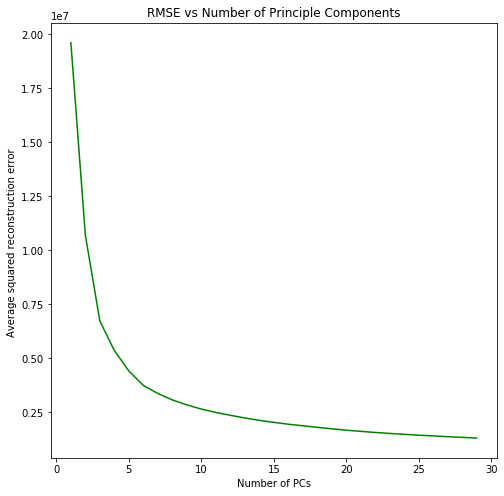

In [17]:
rmse=[]
for pca_num in range(1,30):
    
    U = (X_stand @ (eig_vecs[:, :pca_num - 1])) # Calculate the U matrix with specified principle components
    Approx = ((U @ np.linalg.inv(U.T @ U) @ U.T) @ X_stand) # Reconstruct the matrix
    Approx = Approx * Xstd + Xavg # Undo Standardization
    rmse.append(np.square(Approx - X).sum(axis=1).mean()) # Calculate RMSE and append it to the list

fig = plt.figure(figsize=(8,8))
plt.plot(range(1,len(rmse)+1), rmse, color='g')

plt.xlabel('Number of PCs')
plt.ylabel('Average squared reconstruction error ')
plt.title('RMSE vs Number of Principle Components')
plt.show()

# Reference:
[1] Deisenroth, M. P., Faisal, A. A.,, Ong, C. S. (2020). Mathematics for Machine Learning. Cambridge University Press.  
[2] Alkmim, N. (n.d.). Nasser Alkmim. Retrieved from http://nasseralkmim.github.io/notes/2017/03/20/linear-algebra-change-of-basis-explained-using-python/  
[3] VanderPlas, J. (n.d.). In Depth: Principal Component Analysis. Retrieved from https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html  
[4] Loukas, S. (2020, June 10). How Scikit-Learn's StandardScaler works. Retrieved from https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832  
[5] Mjhoshea. (2020, June 24). Linear Algebra from Strang. Retrieved from https://medium.com/analytics-vidhya/linear-algebra-from-strang-3394007ec79c  
[6] Loukas, S. (2020, June 10). How Scikit-Learn's StandardScaler works. Retrieved from https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832  
[7] Mjhoshea. (2020, June 24). Linear Algebra from Strang. Retrieved from https://medium.com/analytics-vidhya/linear-algebra-from-strang-3394007ec79c  
[8] The Iris Dataset. (n.d.). Retrieved from https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html  
[9] Wang, Z. (2019, September 05). PCA and SVD explained with numpy. Retrieved from https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8  
[10] Dr. Sebastian Raschka. 2020. Principal Component Analysis. [online] Retrieved from https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#:~:text=The%20eigenvectors%20and%20eigenvalues%20of,the%20eigenvalues%20determine%20their%20magnitude  